### Q. 각 날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측해보세요.
#### 대여량예측이니까 선형회귀

1. train.csv / test.csv
- id 고유 id
-hour 시간
- temperature 기온
- precipitation 비가 오지 않았으면 0, 비가 오면 1
- windspeed 풍속(평균)
- humidity 습도
- visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- ozone 오존
- pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count 시간에 따른 따릉이 대여 수


2.  submission.csv (제출 파일 형식)

In [2]:
import pandas as pd
import sklearn.ensemble import RandomForestRegressor

### 1. 데이터 로딩 및 확인

In [153]:
train = pd.read_csv("train.csv")
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [106]:
train.tail()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


In [107]:
type(train)

pandas.core.frame.DataFrame

### 2. 결측치 확인 및 전처리

In [15]:
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [17]:
train.fillna(0, inplace = True)

### 3. 무슨관계에 있을지 몰라 일단 pairplot그려봄

- 근데 따릉이 대여수와 관계있는걸 알고싶다고 했으니까, count(마지막줄) 주목!
- hour_bef_temperature, hour_bef_windspeed, hour_bef_ozone 와는 우상향관계
- hour_bef_humidity	우하향관계

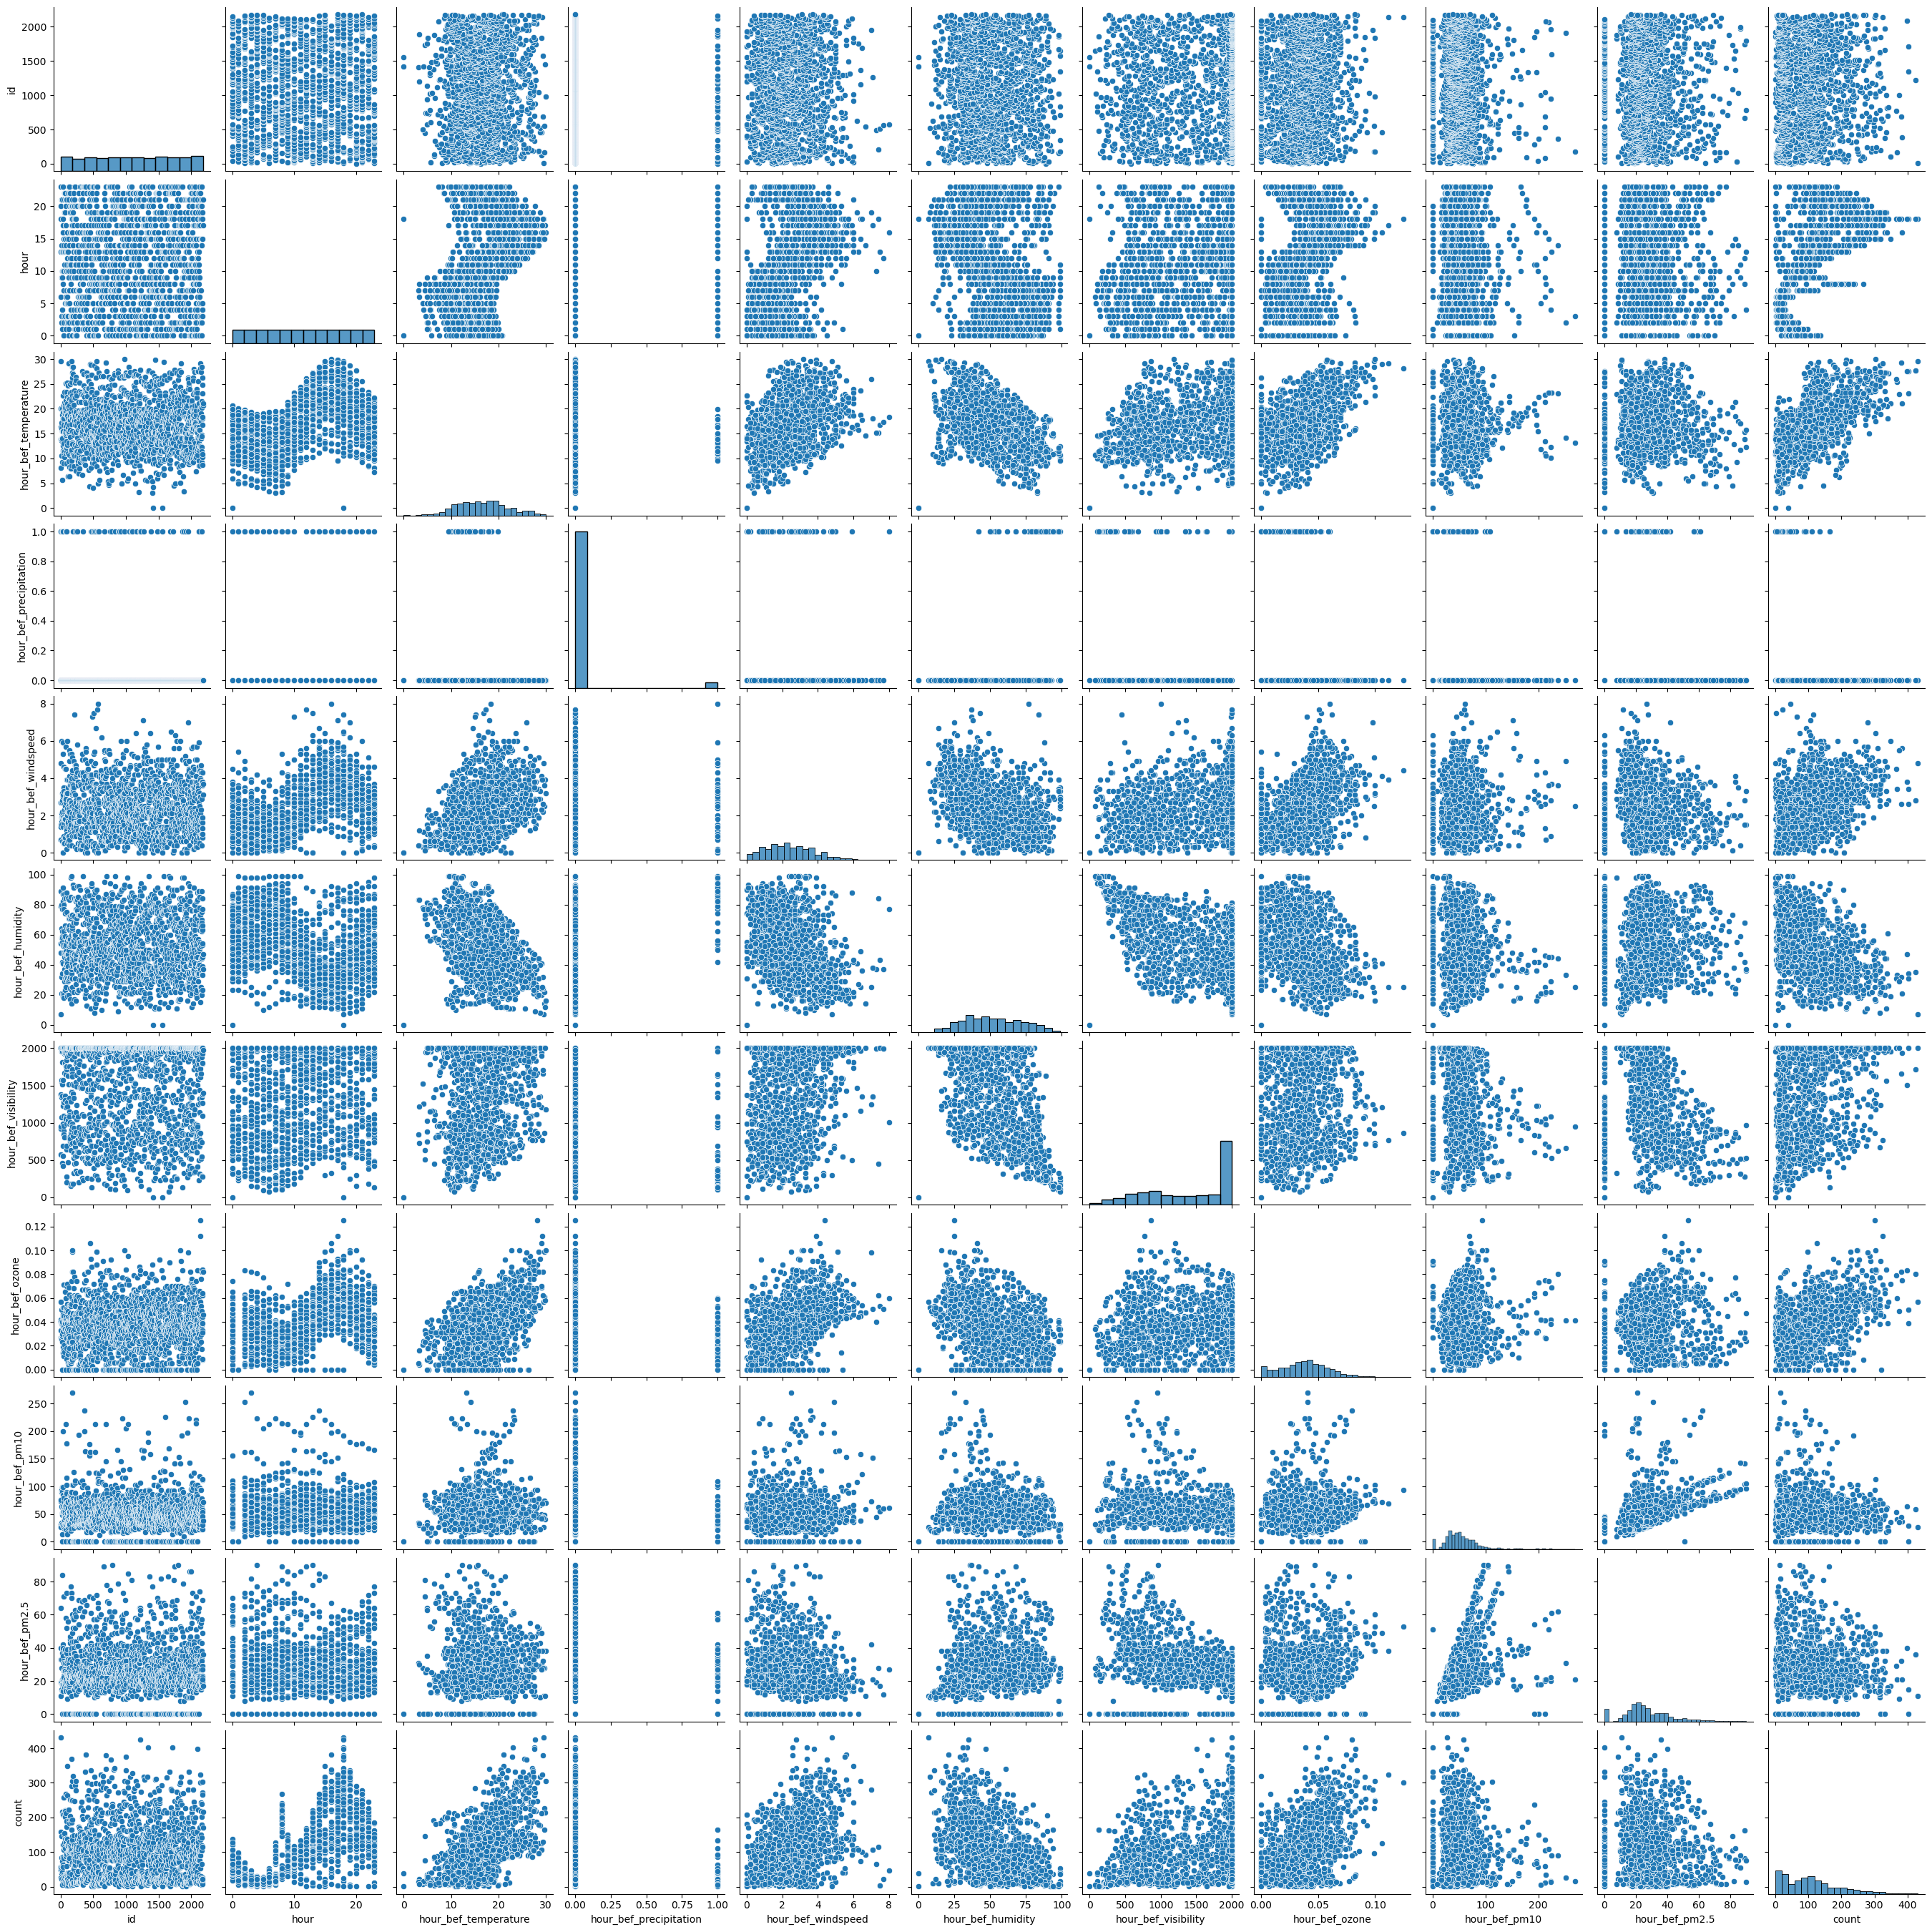

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train)
plt.show()

### count와 선형관계에 있는 것 떼어서 보기

비가 온지 여부 제외하고 전부 선형관계 확인

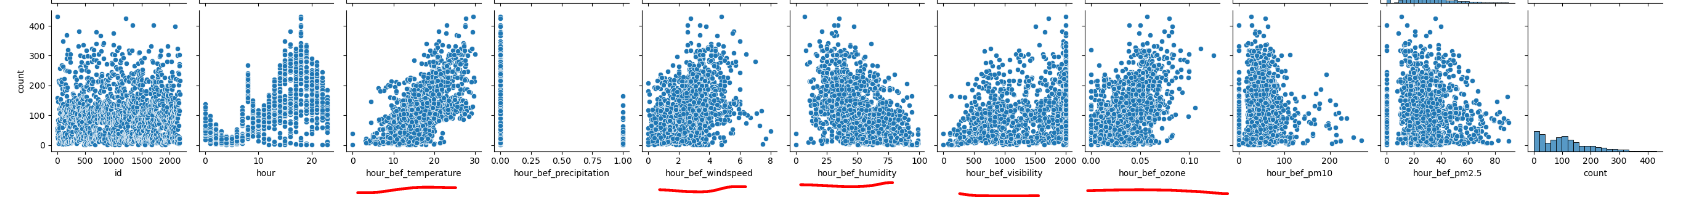

In [135]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [136]:
type(train)

pandas.core.frame.DataFrame

In [137]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

In [142]:
col = ['hour', 'hour_bef_temperature', 
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count']
train_1 = train[col]

In [150]:
train_1.tail()

,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,target
1454,0.1739,0.5093,0.0,0.2000,0.5000,1.0000,0.2295,0.2317,21.0
1455,0.1304,0.2862,0.0,0.4750,0.4130,1.0000,0.2951,0.1341,20.0
1456,0.2174,0.5651,0.0,0.2375,0.5109,1.0000,0.0492,0.1585,22.0
1457,0.9130,0.6543,0.0,0.4625,0.3261,0.6852,0.6475,0.3415,216.0
1458,0.7391,0.6692,0.0,0.3875,0.4348,0.9860,0.3525,0.1098,170.0


### 데이터 정규화

In [143]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# train_1_scaled = scaler.fit_transform(train_1.values[:,:-1]).round(4)

# train_1_scaled_df = pd.DataFrame(train_1_scaled, columns=train_1.columns[:-1])
# train_1_scaled_df['target'] = train_1['count']

# train_1 = train_1_scaled_df

# train_1.tail()

In [151]:
from sklearn.preprocessing import MinMaxScaler #최대 1 최소 0으로 되게끔 

scaler = MinMaxScaler()
scaler.fit(train_1.values[:,:-1])
train_1.values[:,:-1] = scaler.transform(train_1.values[:,:-1]).round(4)

train_1.tail() 

,hour,hour_bef_temperature,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,target
1454,0.1739,0.5093,0.0,0.2000,0.5000,1.0000,0.2295,0.2317,21.0
1455,0.1304,0.2862,0.0,0.4750,0.4130,1.0000,0.2951,0.1341,20.0
1456,0.2174,0.5651,0.0,0.2375,0.5109,1.0000,0.0492,0.1585,22.0
1457,0.9130,0.6543,0.0,0.4625,0.3261,0.6852,0.6475,0.3415,216.0
1458,0.7391,0.6692,0.0,0.3875,0.4348,0.9860,0.3525,0.1098,170.0


#### 텐서로 만들기

In [145]:
x = train_1.values[:,-1:]
y = train_1.values[:,:-1]

In [146]:
data = torch.from_numpy(train_1.values).float()

## 모델구현
### 시계열이므로 RNN으로 구현

#### 어떤 단위로 시퀀스를 끊어줘야 할까? 

시계열 분석에서 시퀀스를 얼마나 끊어주어야 하는지는 주어진 데이터의 특성과 분석 목적에 따라 다릅니다. 따라서 이전 1시간의 값으로 다음 1시간의 값을 예측하는 경우에도 시퀀스를 끊어주는 길이는 데이터의 특성과 분석 목적을 고려하여 결정해야 합니다.

만약 예측 대상인 다음 1시간의 값이 매우 부드러운 변화를 보이는 경우에는 짧은 시퀀스를 사용하는 것이 좋습니다. 이는 모델이 빠르게 변화하는 데이터를 놓치지 않도록 하기 위함입니다. 예를 들어, 주식 가격 예측에서는 5분 또는 10분 단위로 시퀀스를 끊어주는 것이 일반적입니다.

반면에 예측 대상인 다음 1시간의 값이 급격하게 변화하는 경우에는 긴 시퀀스를 사용하는 것이 좋습니다. 이는 모델이 급격한 변화를 놓치지 않도록 하기 위함입니다. 예를 들어, 날씨 예측에서는 1일 단위로 시퀀스를 끊어주는 것이 일반적입니다.

따라서 이전 1시간의 값으로 다음 1시간의 값을 예측하는 경우에도, 데이터의 특성과 분석 목적을 고려하여 적절한 시퀀스 길이를 결정해야 합니다.

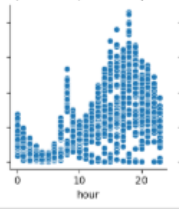

시간에 따른 대여량 변화. 변화량이 좀 급한 것 같아 길게 잡음 오전과 오후 -> 12개 간격

### 파라미터

- input_size: Input의 사이즈에 해당 하는 수를 입력하면 됩니다.
- hidden_size: 은닉층의 사이즈에 해당 하는 수를 입력하면 됩니다.
- num_layers: RNN의 은닉층 레이어 갯수를 나타냅니다. 기본 값은 1입니다.
- nonlinearity: 비선형 활성화 함수를 선택합니다. tanh, relu중 하나를 선택 가능하며, 기본 값은 tanh입니다.
- bias: 바이어스 값 활성화 여부를 선택합니다. 기본 값은 True 입니다.
- batch_first: True일 시, Output 값의 사이즈는 (batch, seq, feature) 가 됩니다. 기본 값은 False 입니다.
- dropout: 드롭아웃 비율을 설정 합니다. 기본 값은 0입니다.
- bidirectional: True일 시, 양방향 RNN이 됩니다. 기본 값은 False 입니다

## 학습함수 만들기

- x, y는 앞서 분할해놀은 데이터
- sequence_length는 하이퍼파라미터 

In [166]:
sequence_length = 12
x_seq, y_seq = seq_data(x, y, sequence_length)

def seq_data(x, y, sequence_length):
    x_seq = []
    y_seq = []
    for i in range(len(x) - sequence_length):
        x_seq.append(x[i: i+sequence_length])
        y_seq.append(y[i+sequence_length])
    
    return torch.FloatTensor(x_seq), torch.FloatTensor(y_seq).view([-1, 1]) 

# float형 tensor로 변형, gpu사용가능하게 .to(device)를 사용. -> gpu없어서 지움

C:\Users\hop09\AppData\Local\Temp\ipykernel_7104\3269865255.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:233.)
  return torch.FloatTensor(x_seq), torch.FloatTensor(y_seq).view([-1, 1])


- 배치형태로 만들기

In [167]:
batch_size = 128
learning_rate = 1e-2

## 모델
- nn.Module을 상속받음
- RNN 에서는 입력노드 수를 정해줘야하고, 레이어의 개수 정해줘야하고, hidden state의 크기도 정해주어야 함

In [168]:
input_size = x_seq.size(2)
num_layers = 2
hidden_size = 8

In [170]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, sequence_length, num_layers, device):
        super(VanillaRNN, self).__init__()
        self.device = device
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Sequential(nn.Linear(hidden_size * sequence_length, 1), nn.Sigmoid())

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size()[0], self.hidden_size).to(self.device) # 초기 hidden state 설정하기.
        out, _ = self.rnn(x, h0) # out: RNN의 마지막 레이어로부터 나온 output feature 를 반환한다. hn: hidden state를 반환한다.
        out = out.reshape(out.shape[0], -1) # many to many 전략
        out = self.fc(out)
        return out
    
model = VanillaRNN(input_size=input_size,
                   hidden_size=hidden_size,
                   sequence_length=sequence_length,
                   num_layers=num_layers,
                   device=device).to(device)

NameError: name 'device' is not defined

### 옵티마이저, 손실함수 설정

In [162]:
loss = nn.MSELoss()

num_epochs = 200
optimizer = optim.Adam(model.parameters(), lr=lr)

NameError: name 'model' is not defined